In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# 1. DATA LOADING <a id="data-loading-eda"></a>
# 1.1 Importing the Dataset
import pandas as pd

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [6]:
n_dup = df.duplicated().sum()
print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 1081


Feature engineering

In [7]:
df['Hour'] = (df['Time'] // 3600).astype(int)
df['Day'] = df['Hour'] // 24


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


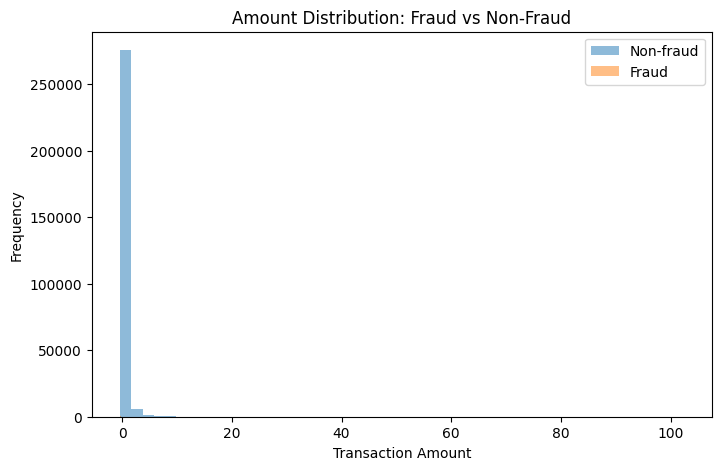

In [9]:
import matplotlib.pyplot as plt

# Separate fraud and non-fraud amounts
fraud = df[df['Class'] == 1]['Amount']
non_fraud = df[df['Class'] == 0]['Amount']

plt.figure(figsize=(8,5))

plt.hist(non_fraud, bins=50, alpha=0.5, label='Non-fraud')
plt.hist(fraud, bins=50, alpha=0.5, label='Fraud')

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Amount Distribution: Fraud vs Non-Fraud')

plt.show()


<Axes: xlabel='Hour'>

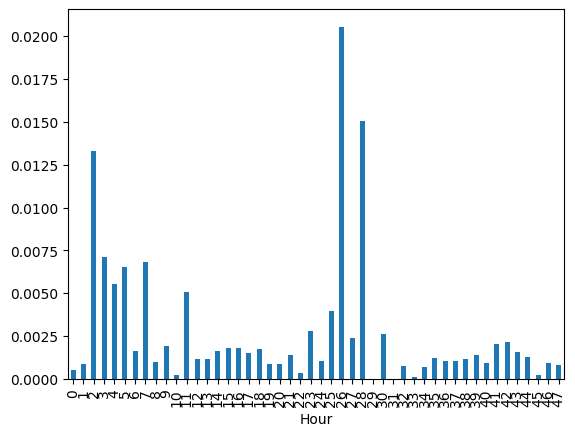

In [10]:
df.groupby('Hour')['Class'].mean().plot(kind='bar')


<Axes: xlabel='HourOfDay'>

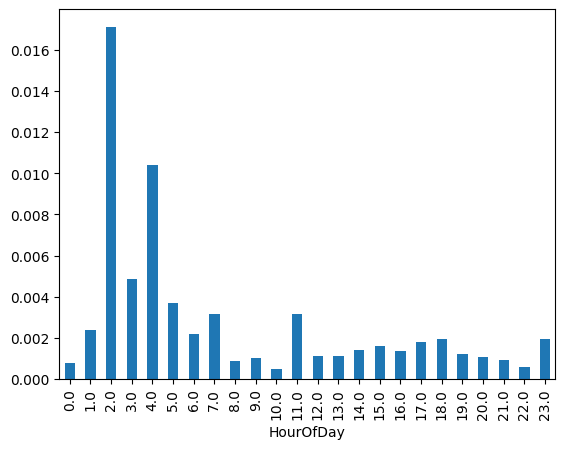

In [11]:
df['HourOfDay'] = df['Time'] // 3600 % 24
df.groupby('HourOfDay')['Class'].mean().plot(kind='bar')


It looks like fraud happens more when there's not many staff? (because it's night)

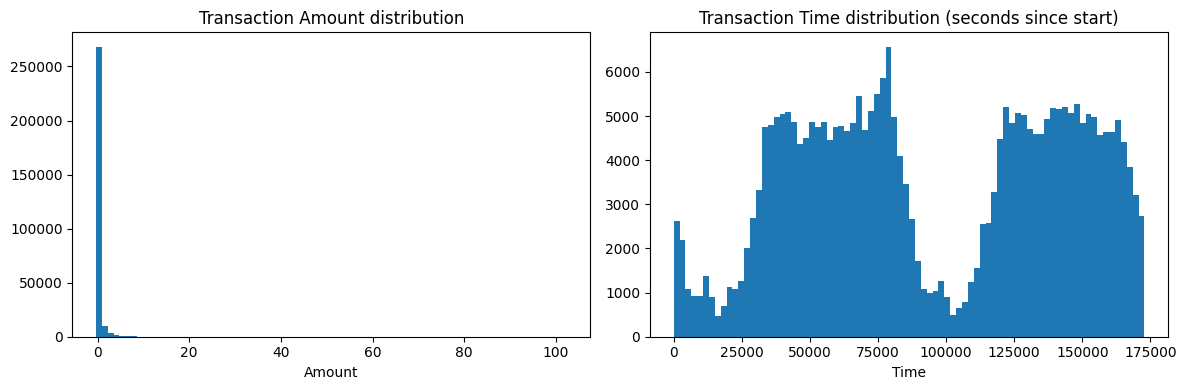

<Figure size 600x400 with 0 Axes>

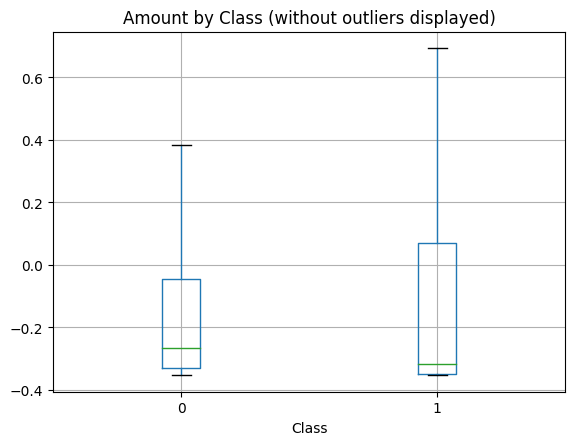

In [12]:
# 4.2 Simple plots
# Spot skew and potential transformations (log), and class separation by amount/time.

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=80)
plt.title('Transaction Amount distribution')
plt.xlabel('Amount')

plt.subplot(1,2,2)
plt.hist(df['Time'], bins=80)
plt.title('Transaction Time distribution (seconds since start)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

# Boxplot of Amount by Class (fraud vs non-fraud)
plt.figure(figsize=(6,4))
df.boxplot(column='Amount', by='Class', showfliers=False)
plt.title('Amount by Class (without outliers displayed)')
plt.suptitle('')
plt.show()



okay do it looks like fraudsters often attempt higher-value charges. That makes transaction amount a strong predictive feature for fraud detection

EDA : Correlation matrix

Top correlations with Class:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Bottom correlations with Class:
 V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


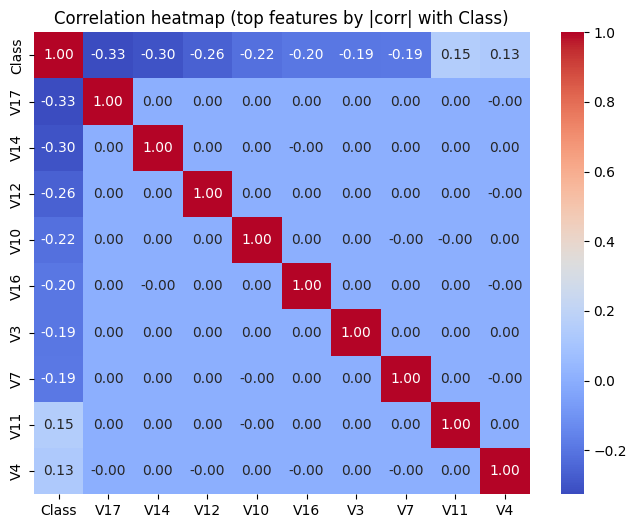

In [13]:
import seaborn as sns
corr_with_target = df.corr()['Class'].sort_values(ascending=False)
print("Top correlations with Class:\n", corr_with_target.head(10))
print("\nBottom correlations with Class:\n", corr_with_target.tail(10))

top_feats = corr_with_target.abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (top features by |corr| with Class)')
plt.show()

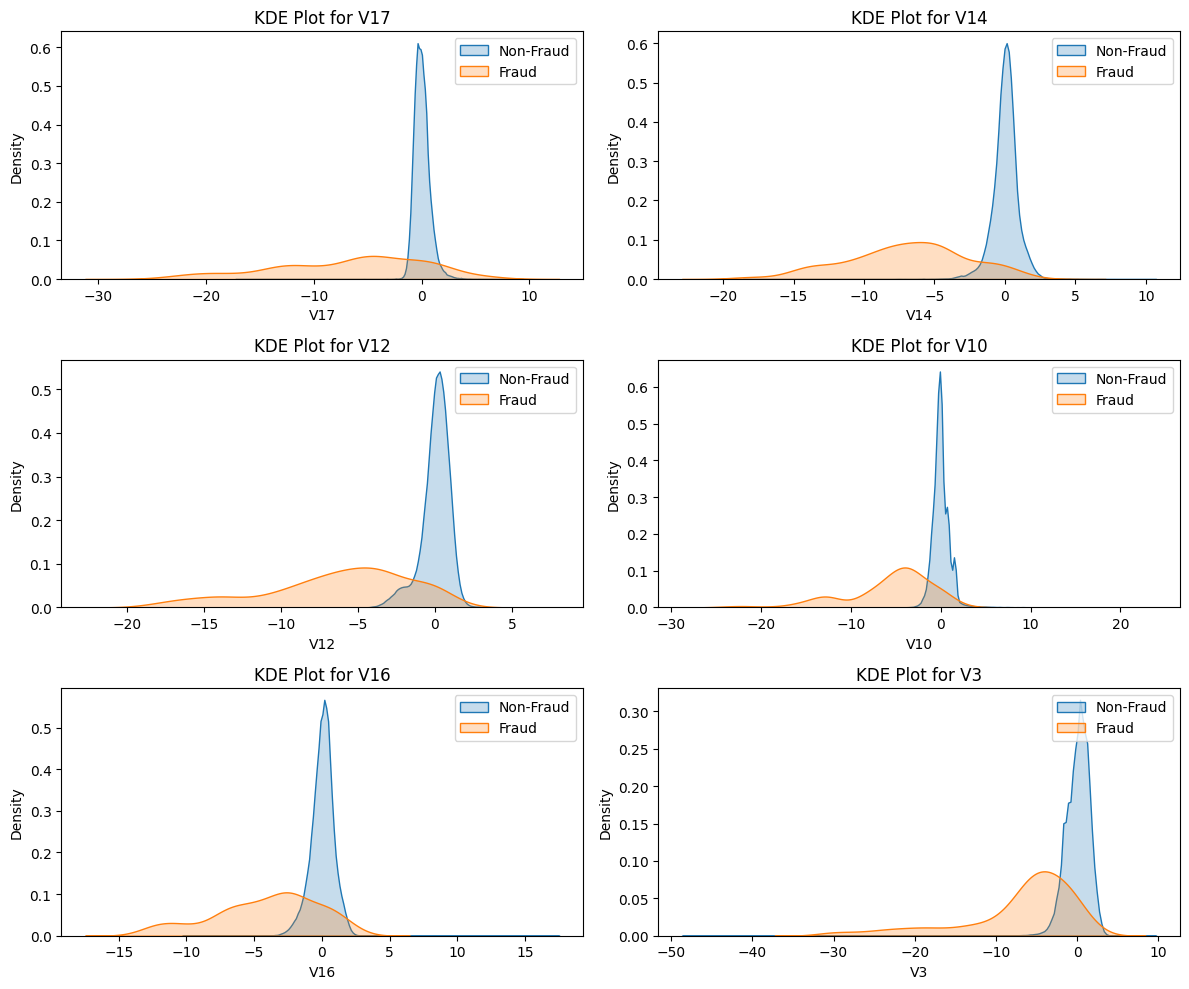

In [14]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

top_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3']

plt.figure(figsize=(12, 10))

for i, feat in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(non_fraud[feat], fill=True, label='Non-Fraud', common_norm=False)
    sns.kdeplot(fraud[feat], fill=True, label='Fraud', common_norm=False)
    plt.title(f'KDE Plot for {feat}')
    plt.legend()

plt.tight_layout()
plt.show()


Logistic regression + SMOT

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

#df["Hour"] = (df["Time"] // 3600).astype(int)
#df["Day"]  = df["Hour"] // 24

scaler = StandardScaler()

#df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
#df["time_scaled"] = scaler.fit_transform(df[["Time"]])



# Separate fraud and non-fraud
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(len(fraud_df), random_state=42)

# Combine undersampled dataset
#df_balanced = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

# Features and target
X = df.drop(columns=['Class'])
y = df['Class']


#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y       
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))



X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test_scaled[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

Train shape: (227845, 33) Test shape: (56962, 33)
Train class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression with class_weight
log_reg = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    #n_jobs=-1
)

log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9619    0.9805     56864
           1     0.0399    0.9184    0.0764        98

    accuracy                         0.9618     56962
   macro avg     0.5199    0.9401    0.5284     56962
weighted avg     0.9982    0.9618    0.9789     56962

Confusion matrix:
 [[54696  2168]
 [    8    90]]
ROC AUC: 0.9720524552674193


In [17]:
import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier



# Feature engineering
#df['Hour'] = (df['Time'] // 3600).astype(int)
#df['Day'] = df['Hour'] // 24

#df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
#df["time_scaled"] = StandardScaler().fit_transform(df[["Time"]])


# Features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calculate scale_pos_weight
scale = (len(y_train) - y_train.sum()) / y_train.sum()

# XGBoost model
model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=scale,
    n_jobs=-1,
    tree_method='hist'
)

# Training with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False,
    early_stopping_rounds=20
)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     56864
           1     0.7818    0.8776    0.8269        98

    accuracy                         0.9994     56962
   macro avg     0.8908    0.9386    0.9133     56962
weighted avg     0.9994    0.9994    0.9994     56962


Confusion matrix:
 [[56840    24]
 [   12    86]]

ROC AUC: 0.9842949665797665


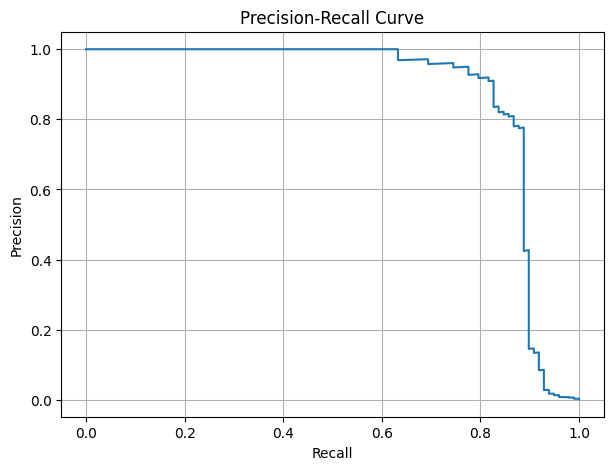

In [18]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Best threshold index
best_idx = f1_scores.argmax()

best_threshold = thresholds[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]
best_f1 = f1_scores[best_idx]

best_threshold, best_precision, best_recall, best_f1


(0.89081824, 0.9101123595505618, 0.826530612244898, 0.8663101604278074)

In [20]:
y_pred_custom = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56856     8]
 [   17    81]]


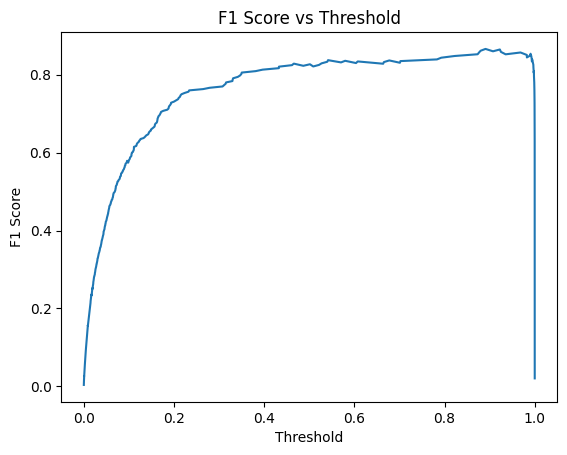

In [21]:
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores[:-1])  # last point has no threshold
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.show()


In [22]:


# 7.5 Re-Evaluation of the Model with the New Threshold
# This is to increase the precision (fraud), Fscore, and reduce false positive although recall (fraud) might drop slightly


optimal_pred = (y_proba >= best_threshold).astype(int)

print("Confusion Matrix (optimal threshold):")
print(confusion_matrix(y_test, optimal_pred))

print("\nClassification Report:")
print(classification_report(y_test, optimal_pred))

print("\nROC-AUC Score (unchanged):", roc_auc_score(y_test, y_proba))



Confusion Matrix (optimal threshold):
[[56856     8]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score (unchanged): 0.9842949665797665


In [23]:


#7.6 Checking future importance
#  This is to understand which features are influencing predictions, even if the model performs well.

# Get feature importance from logistic regression coefficients
importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': log_reg.coef_[0]
})

# Sort by absolute value of coefficient
importance['abs_value'] = importance['coefficient'].abs()
importance = importance.sort_values(by='abs_value', ascending=False)

importance.head(15)



,feature,coefficient,abs_value
14,V14,-0.867248,0.867248
4,V4,0.782098,0.782098
3,V3,-0.480206,0.480206
12,V12,-0.399408,0.399408
10,V10,-0.388873,0.388873
13,V13,-0.255167,0.255167
16,V16,-0.250398,0.250398
9,V9,-0.238416,0.238416
17,V17,-0.225204,0.225204
1,V1,0.206610,0.206610


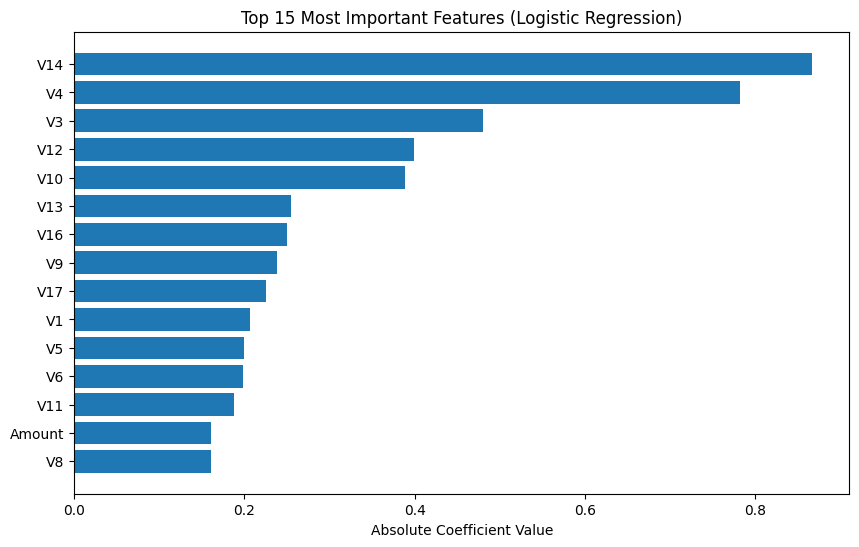

In [24]:


# 7.7 Plotting the feature

plt.figure(figsize=(10,6))
plt.barh(importance['feature'][:15], importance['abs_value'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.show()

